In [1]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\masoka\Downloads\brain\Brain_Cancer",
    image_size = (256,256),
    batch_size = 32)

In [ ]:
len(dataset)

In [ ]:
a = 0.8*190
a

In [ ]:
train_ds = dataset.take(152)
len(train_ds)

In [ ]:
b = (190-152)
b

In [8]:
c = 0.9*38
c

34.2

In [9]:
test = dataset.skip(152)
len(test)

38

In [10]:
val_ds = test.take(34)
len(val_ds)

34

In [11]:
test_ds = test.skip(34)
len(test_ds)

4

In [12]:
class_names = dataset.class_names
class_names

['brain_glioma', 'brain_menin', 'brain_tumor']

In [13]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 2 1 2 0 1 0 0 0 1 1 0 0 0 2 0 2 2 1 0 0 1 2 0 2 2 0 2 2 0 1 0]


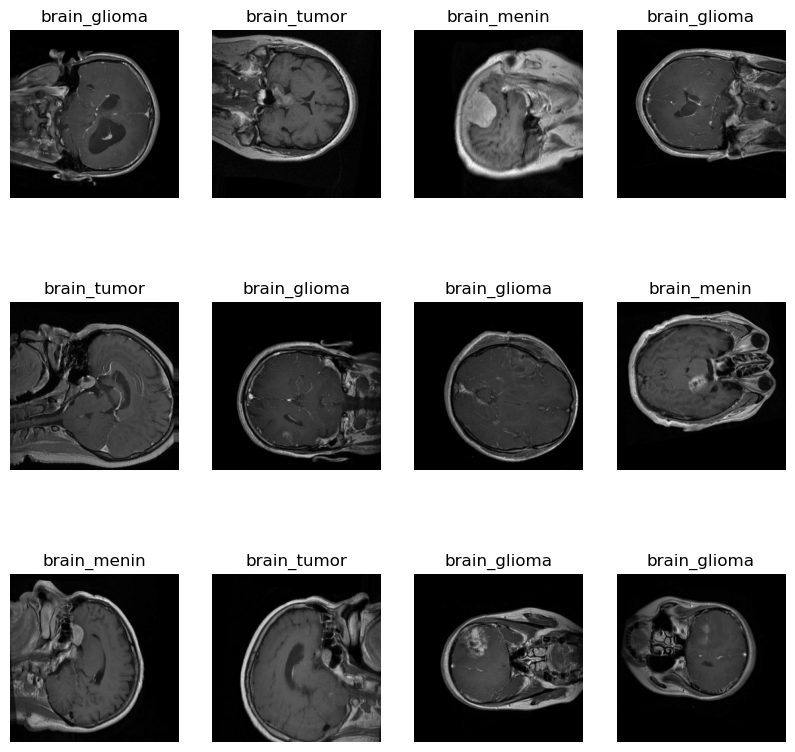

In [14]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [15]:
from tensorflow.keras import layers, models

model = models.Sequential([

    # 1st Conv + Pool
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2,2)),

    # 2nd Conv + Pool
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # 3rd Conv + Pool
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Flatten + Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    
    layers.Dense(3, activation='softmax')
])


C:\Users\masoka\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,518,091 (169.82 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,678,728 (113.22 MB)

In [32]:
model.compile(
    optimizer='adam',                     # how weights are updated
    loss='sparse_categorical_crossentropy',  # error function to minimize
    metrics=['accuracy']                  # what to monitor during training
)


In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30)

Epoch 1/30
  3/152 ━━━━━━━━━━━━━━━━━━━━ 1:39 671ms/step - accuracy: 0.9167 - loss: 0.1726